<a href="https://colab.research.google.com/github/diefgallegorio/Datanova/blob/master/extended_case_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>How can we control the increasing number of accidents in New York?</h1>

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [2]:
json_load = open(r"borough_data.json")
borough = json.load(json_load)
type(borough), borough

(dict,
 {'bronx': {'area': 42.1, 'name': 'bronx', 'population': 1471160.0},
  'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
  'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
  'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
  'staten island': {'area': 58.37,
   'name': 'staten island',
   'population': 479458.0}})

-------

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [3]:
df = pd.read_csv("accidents.csv", sep=';')
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object

In [4]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


-------

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [5]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[ ] Road safety audits at high risk locations</li>
<li>[ ] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[ ] Creation of pedestrian refuge islands</li>
<li>[ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

-------<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[x] Road safety audits at high risk locations</li>
<li>[x] Expansion in the cycle track network</li>
<li>[x] Targeted education and awareness initiatives</li>
<li>[x] Creation of pedestrian refuge islands</li>
<li>[x] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

In [6]:
df['date'] = pd.to_datetime(df['DATE'])
serie = df.groupby(df['date'].dt.to_period('M'))['DATE'].count()

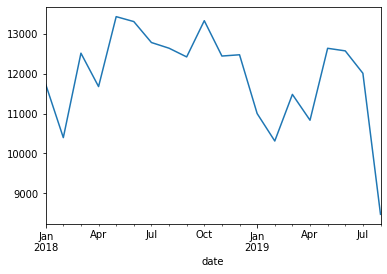

In [7]:
serie.plot()

In [8]:
#Transformo seria a tipo dataframe
serie_data_frame = pd.DataFrame(serie)
serie_data_frame.iloc[:]

,DATE
date,
2018-01,11735
2018-02,10395
2018-03,12519
2018-04,11679
2018-05,13438
2018-06,13314
2018-07,12787
2018-08,12644
2018-09,12425


The month of August of 2019 apparently does not have every day (only to 25 of august), uotlayer data. Qualitatively, 2019 has fewer accidents, but there are seasonalities in some months in which the number of accidents accelerates. To validate the previous hypothesis, it is recommended to have more data. 

In [9]:
filtered_df = df.query("date >= '2019-08-01' and date <='2019-08-31'")
serie2 = filtered_df.groupby(filtered_df['date'].dt.to_period('D'))['DATE'].count()
serie2

#Se observa que tiene registros hasta el día 24 de agosto

date
2019-08-01    393
2019-08-02    386
2019-08-03    373
2019-08-04    314
2019-08-05    409
2019-08-06    345
2019-08-07    379
2019-08-08    429
2019-08-09    406
2019-08-10    371
2019-08-11    296
2019-08-12    377
2019-08-13    305
2019-08-14    353
2019-08-15    354
2019-08-16    341
2019-08-17    354
2019-08-18    304
2019-08-19    359
2019-08-20    360
2019-08-21    333
2019-08-22    333
2019-08-23    311
2019-08-24    281
Freq: D, Name: DATE, dtype: int64

In [10]:
filtered_df = df.query("date >= '2019-08-25' and date <='2019-08-31'")
print(filtered_df)
#Se confirma que posterior al 24 de agosto, no hay registros en el mes.

Empty DataFrame
Columns: [DATE, TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, ON STREET NAME, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5, date]
Index: []


***Teniendo como base la gráfica de líneas realizada, observo mínimos anuales en el mes de febrero (puede ser debido a que es un mes con un menor número de días), adicionalmente se observa una cantidad reducida de sucesos en el mes de agosto del 2019, lo cual puede ser debido a falta de datos, ya que no hay registro de algunos días de este mes.***

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

-------January, February, and April appear to have fewer records for both years; They can be seasonal themes, winter among others, in which there is less traffic.

Se observa una menor cantidad en los meses de febrero, pero esto puede ser debido a la cantidad de días que posee dicho mes es menor en comparación con los demás. 

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

In [11]:
df['time'] =pd.to_datetime(df['TIME'])

In [12]:
df["HOUR"] = df.time.dt.hour

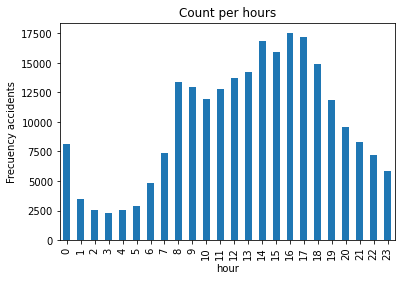

In [13]:
#Graficas por clases
count_classes = pd.value_counts(df.HOUR, sort = False)
count_classes.plot.bar()
plt.title("Count per hours")
plt.xlabel("hour")
plt.ylabel("Frecuency accidents");

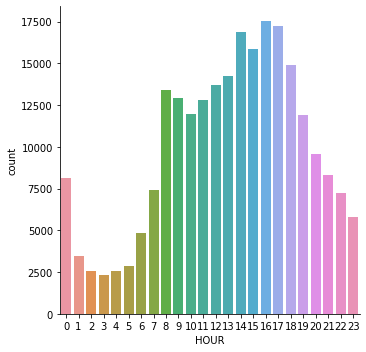

In [14]:
sns.catplot(x = "HOUR", data = df, kind = "count");

In [15]:
count_classes = pd.value_counts(df.HOUR, sort = True)
count_classes

16    17536
17    17209
14    16889
15    15886
18    14899
13    14224
12    13731
8     13403
9     12939
11    12815
10    11981
19    11885
20     9597
21     8330
0      8160
7      7399
22     7216
23     5807
6      4844
1      3460
5      2878
2      2570
4      2562
3      2302
Name: HOUR, dtype: int64

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

-------
* The hour factor is important, but by itself it can lead to misinterpretation. Crossing the day of the week can indicate which are the days with the highest frequency of accidents per hour; The hours of a Sunday are not the same as those of a Friday; In addition, it can be said which days it has similar behavior. <br/>

* Making another category or table crossed between place and time can indicate us spaces with the highest frequency of accidents in an hour to determine and that if it can be used to take preventive measures and if we add the day to that, the qualitative summary of the data would be substantially improved.

**Aunque no se tuvieron en cuenta estas dos variables, al tener una información como la obtenida anteriormente, se pueden tomar medidas preventivas para evitar estos sucesos. De todos modos si se cruza con los lugares de ocurrencia y las fechas, se puede modelar de una manera más detallada y así focalizar, por ejemplo, zonas donde mayor impacto hay de accidentes en cierta temporada y a cierta hora del día, para así darle un mayor control.**

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

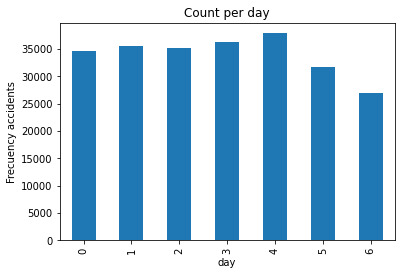

In [16]:
df["day"] = df.date.dt.weekday
count_classes = pd.value_counts(df.day, sort = False)
count_classes.plot.bar()
plt.title("Count per day")
plt.xlabel("day")
plt.ylabel("Frecuency accidents");

In [17]:
count_classes = pd.value_counts(df.day, sort = True)
count_classes

4    37886
3    36254
1    35651
2    35188
0    34719
5    31784
6    27040
Name: day, dtype: int64

In [18]:
preserved_mapper = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_1'] =df.day.replace(preserved_mapper)
df = df.sort_values('day')
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date,time,HOUR,day,day_1
180048,05/07/2018,17:30,MANHATTAN,10018.0,40.757732,-73.99686,10 AVENUE,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3897725,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN,2018-05-07,2020-09-08 17:30:00,17,0,Mon
193140,05/21/2018,11:30,QUEENS,11375.0,40.715523,-73.84236,ASCAN AVENUE,0,0,0,0,0,0,Turning Improperly,Unspecified,Unspecified,NaN,NaN,3905397,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,2018-05-21,2020-09-08 11:30:00,11,0,Mon
103078,02/18/2019,4:46,BROOKLYN,11237.0,40.712963,-73.92761,MEADOW STREET,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4082526,Sedan,NaN,NaN,NaN,NaN,2019-02-18,2020-09-08 04:46:00,4,0,Mon
29044,07/08/2019,8:30,MANHATTAN,10028.0,40.779540,-73.95978,EAST 84 STREET,0,0,0,0,0,0,Passing or Lane Usage Improper,Driver Inexperience,NaN,NaN,NaN,4166413,Taxi,Taxi,NaN,NaN,NaN,2019-07-08,2020-09-08 08:30:00,8,0,Mon
29045,06/10/2019,0:00,BRONX,10455.0,40.812283,-73.90447,EAST 149 STREET,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,NaN,4148438,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019-06-10,2020-09-08 00:00:00,0,0,Mon


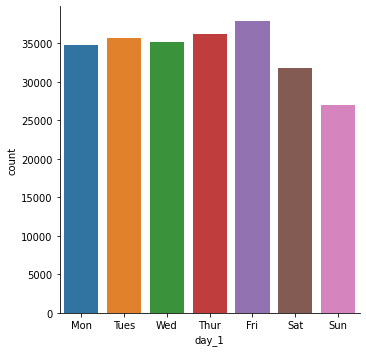

In [19]:
sns.catplot(x = "day_1", data = df, kind = "count");

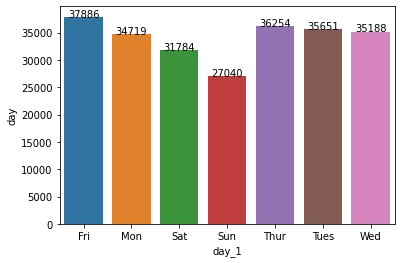

In [20]:
groupedvalues = df.groupby('day_1').count().reset_index()
g= sns.barplot(x = 'day_1', y = 'day', data = groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.day - 16, round(row.day, 2), color = 'black', ha = "center")

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

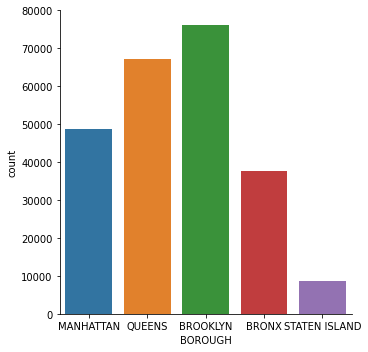

In [21]:
sns.catplot(x = "BOROUGH", data = df, kind = "count");

In [22]:
pd.value_counts(df.BOROUGH, sort = True)

BROOKLYN         76253
QUEENS           67120
MANHATTAN        48749
BRONX            37709
STATEN ISLAND     8691
Name: BOROUGH, dtype: int64

In [23]:
'''
#agrego valores de sucesos por milla de acuerdo a la ciudad

TMP=pd.value_counts(df.BOROUGH, sort=False)
for i in borough:
  are=borough[i]['area']
  ind=TMP.index.get_loc(i)
  spm=are/TMP[ind]
  print(borough[i].update({'SPM',spm}))
'''

#Manual
borough['brooklyn'].update({'SPM': 1076})
borough['queens'].update({'SPM': 618})
borough['manhattan'].update({'SPM': 2135})
borough['bronx'].update({'SPM': 895})
borough['staten island'].update({'SPM': 148})

borough

{'bronx': {'SPM': 895, 'area': 42.1, 'name': 'bronx', 'population': 1471160.0},
 'brooklyn': {'SPM': 1076,
  'area': 70.82,
  'name': 'brooklyn',
  'population': 2648771.0},
 'manhattan': {'SPM': 2135,
  'area': 22.83,
  'name': 'manhattan',
  'population': 1664727.0},
 'queens': {'SPM': 618,
  'area': 108.53,
  'name': 'queens',
  'population': 2358582.0},
 'staten island': {'SPM': 148,
  'area': 58.37,
  'name': 'staten island',
  'population': 479458.0}}

In [24]:
lista={}
for i in borough:
  lista[i]=borough[i]['SPM']

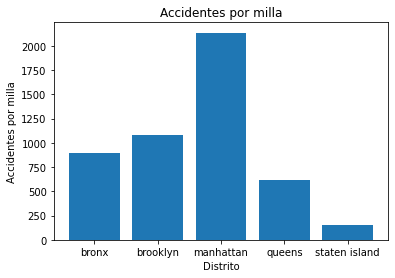

In [25]:
plt.bar(range(len(lista)), list(lista.values()), align='center')
plt.xticks(range(len(lista)), list(lista.keys()))
plt.title("Accidentes por milla")
plt.xlabel("Distrito")
plt.ylabel("Accidentes por milla");


**Aunque en la primer gráfica se observa una mayor concentración de accidentes en brooklyn, no se puede medir adecuadamente con los demás lugares, debido a que son de tamaños diferentes, por ello, a partir de la segunda gráfica se tiene como referente el número de accidentes por milla cuadrada, dando como resultado que donde mayor accidentes hay de acuerdo al área es Manhattan.**

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

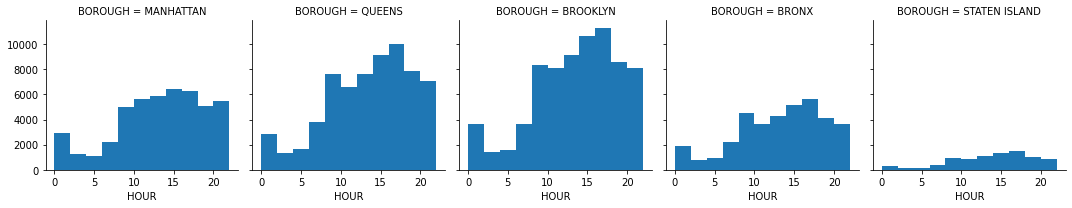

In [26]:
bins = np.arange(0, 24, 2)
g = sns.FacetGrid(df, col="BOROUGH")
g = g.map(plt.hist, "HOUR",bins=bins)

<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

**Aunque la gráfica anterior no tiene mucho detalle, se puede observar que se conserva un mismo patron de horas en cada uno de los distritos, donde no hay muchos accidentes en horas de la madrugada, pero aumentan en horas de la tarde, teniendo mayores valores entre las 2pm y 6pm. 
Asimismo, como mencionan en el párrafo anterior, no hay un aumento significativo en algunas localidades como para denotar unos picos máximos generales, por lo tanto se debería considerar ponerlo por localidades.**

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

**Answer.**

In [27]:
groupedvalues2 = df.groupby('CONTRIBUTING FACTOR VEHICLE 1').count().reset_index()
groupedvalues2.sort_values(["DATE"], axis=0, ascending=False, inplace=True) 
groupedvalues2.reset_index().iloc[:,1:3]

,CONTRIBUTING FACTOR VEHICLE 1,DATE
0,Unspecified,59307
1,Driver Inattention/Distraction,58551
2,Failure to Yield Right-of-Way,18236
3,Following Too Closely,15370
4,Backing Unsafely,13876
5,Passing Too Closely,11337
6,Passing or Lane Usage Improper,10469
7,Other Vehicular,7509
8,Turning Improperly,6043
9,Unsafe Lane Changing,5932


Dado que intenté algunas maneras de concatenar y recorrer adecuadamente el ejercicio, no lo logré de manera adecuada, por lo cual recurrí sólo a contar las causas de acuerdo a la primer columna, donde se observa que en la mayoría de casos no se escecifica las causas del accidente, pero tiene una cantidad similar la causa de distracción del conductor.

<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

In [30]:
groupedvalues3 = df.groupby('VEHICLE TYPE CODE 1').count()
groupedvalues3.sort_values(["DATE"], axis=0, ascending=False, inplace=True) 
groupedvalues3.reset_index().iloc[:20,0:2]

,VEHICLE TYPE CODE 1,DATE
0,Sedan,86879
1,Station Wagon/Sport Utility Vehicle,68098
2,PASSENGER VEHICLE,22950
3,SPORT UTILITY / STATION WAGON,17360
4,Taxi,8925
5,Pick-up Truck,5731
6,Box Truck,4140
7,Bus,3142
8,TAXI,2946
9,Bike,2114


In [31]:
#Reemplazo valores que se toman como valores diferentes por su expresión en mayusculas
df['VEHICLE TYPE CODE 1'].replace(to_replace ="Taxi", value ="TAXI",inplace=True)
df['VEHICLE TYPE CODE 1'].replace(to_replace ="Pick-up Truck", value ="PICK-UP TRUCK",inplace=True)

In [32]:
groupedvalues3 = df.groupby('VEHICLE TYPE CODE 1').count().reset_index()
groupedvalues3.sort_values(["DATE"], axis=0, ascending=False, inplace=True) 
groupedvalues3.reset_index().iloc[:10,1:3]

,VEHICLE TYPE CODE 1,DATE
0,Sedan,86879
1,Station Wagon/Sport Utility Vehicle,68098
2,PASSENGER VEHICLE,22950
3,SPORT UTILITY / STATION WAGON,17360
4,TAXI,11871
5,PICK-UP TRUCK,7189
6,Box Truck,4140
7,Bus,3142
8,Bike,2114
9,Van,1347


-------

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[X] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[X] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

**Adicional al mapa de calor mencionado, consideraría tomar otras fuentes de datos que contengan otras variables tales como la cantidad en circulación de vehículos y peatones y estado de las vias en ambos periodos**

-------

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

-------